# Get City Info

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
city_information = {}
for line in coordination_source.split("\n"):
    if line.strip() and not line.startswith("//"):
        city_name = re.findall(r'name:\'(.+)\'', line)[0]
        coordinates = re.findall(r'\[(.+), (.+)\]', line)[0]
        coordinates = tuple(map(float, coordinates))
        city_information[city_name] = coordinates
city_information

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [4]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [5]:
import math
def get_city_distance(city1, city2):
    return geo_distance(city_information[city1], city_information[city2])

In [6]:
get_city_distance("合肥", "南京")

168.16731900926806

# Plot Charts

In [7]:
cities = list(city_information.keys())
cities[:10]

['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南']

In [8]:
import networkx as nx

In [9]:
city_graph = nx.Graph()
city_graph.add_nodes_from(cities)

In [10]:
nx.draw(city_graph,city_information, with_labels=True, node_size=5)

# get city connection information

In [11]:
get_city_distance("乌鲁木齐", "嘉峪关")

1165.8679943488457

In [12]:
from collections import defaultdict

In [13]:
city_connection = defaultdict(list)
threshold = 700
for c1 in cities:
    for c2 in cities:
        if c1 == c2:
            continue
        if get_city_distance(c1, c2) < threshold:
             city_connection[c1].append(c2)

In [14]:
city_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [15]:
city_connection_graph = nx.Graph(city_connection)

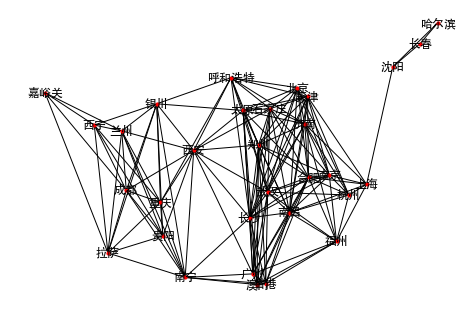

In [17]:
nx.draw(city_connection_graph, city_information, with_labels=True, node_size=10)

# routine planning

In [17]:
def search_destination(city_graph, start, destination):
    pathes = [[start]]
    seen = set()
    valid_pathes = []
    while pathes:
        curr_path = pathes.pop(0)
        curr_city = curr_path[-1]
        if curr_city in seen: continue
        seen.add(curr_city)
        next_cities = city_graph[curr_city]
        for next_city in next_cities:
            new_path = curr_path + [next_city]
            if next_city == destination:
                #valid_pathes.append(new_path)
                return new_path
            else:
                pathes.append(new_path)
    return []
    #return valid_pathes

In [18]:
search_destination(city_connection_graph, "杭州", "拉萨")

['杭州', '武汉', '广州', '南宁', '拉萨']

# shortest path first

In [22]:
from functools import reduce
from operator import add


In [28]:
def get_path_distance(path):
    return reduce(add, [geo_distance(city_information[path[i]], city_information[path[i+1]]) for i in range(len(path)-1)])

def sort_pathes(pathes, sort_func, beam):
    return sorted(pathes, key=sort_func)[:beam]


In [29]:
def search_destination(city_graph, start, destination, strategy_func, beam):
    pathes = [[start]]
    seen = set()
    valid_pathes = []
    while pathes:
        curr_path = pathes.pop(0)
        curr_city = curr_path[-1]
        if curr_city in seen: continue
        seen.add(curr_city)
        next_cities = city_graph[curr_city]
        for next_city in next_cities:
            new_path = curr_path + [next_city]
            if next_city == destination:
                #valid_pathes.append((get_path_distance(new_path),new_path))
                return new_path
            else:
                pathes.append(new_path)
            #pathes = strategy_func(pathes)
        #pathes = sort_pathes(pathes, lambda x: -len(x), 20)
        #pathes = sort_pathes(pathes, lambda p: len(p)+get_city_distance(p[-1], destination), 20)
        pathes = strategy_func(pathes, beam)
    return []
    #return valid_pathes

In [30]:
def comprehensive_sort(pathes, beam):
    return sort_pathes(pathes, lambda p: len(p) + get_path_distance(p), beam)

In [31]:
search_destination(city_connection_graph, "北京", "拉萨", comprehensive_sort, 30)

['北京', '武汉', '长沙', '南宁', '拉萨']

In [38]:
def shortest_distance(pathes, beam):
    return sort_pathes(pathes, lambda p:get_path_distance(p), beam)

In [39]:
search_destination(city_connection_graph, "北京", "拉萨", shortest_distance, 30)

['北京', '武汉', '长沙', '南宁', '拉萨']